In [57]:
import csv
import os
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
from __future__ import division
import re
from scipy import optimize as sp
import glob
import scipy
from os import path


In [99]:
directory = "/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_inlab/sex_morph/graphs/csv_files/*.csv"

In [100]:
datafiles = []
datafiles.append(glob.glob(directory))

In [101]:
datafiles[0]

['/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_inlab/sex_morph/graphs/csv_files/csvFile for F001YQ0.csv',
 '/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_inlab/sex_morph/graphs/csv_files/csvFile for f0042w6.csv',
 '/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_inlab/sex_morph/graphs/csv_files/csvFile for F003X50.csv',
 '/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_inlab/sex_morph/graphs/csv_files/csvFile for f003d5q.csv',
 '/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_inlab/sex_morph/graphs/csv_files/csvFile for f003d8d.csv',
 '/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_inlab/sex_morph/graphs/csv_files/csvFile for F003WYC.csv',
 '/Users/marie/D

In [88]:
def fitting(x, x0, L, R, slope):
    return L-((L-R)/(1+exp((-x+x0)/slope)))


In [10]:
# len('/Users/marie/Documents/Projects/morph_project/data/pilot/sex_morph/sex_morph_results_20190619_1846/csv-results-files/CSV_Files/csvFile for')
# name = datafiles[0][0][139:-4]
# name


In [62]:
# plot function

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


def plotting(popt, steps, continuum, continuumname, name):
    popt, pcov = scipy.optimize.curve_fit(fitting, running_mean(steps,2), running_mean(continuum,2))#, bounds=(0,[10,1,1,inf]))
    plt.plot(np.arange(1,9,0.1), fitting(np.arange(1,9,0.1), *popt), 'r-', label='fit')
    plt.plot(steps, continuum)
    plt.ylim([0.0, 1.05])
    plt.title(name +" " +str(continuumname))
    plt.savefig(path.join(outpath, name + ' ' + str(continuumname + '.jpeg'))) # + ' ' + str(continuum[0]), format='jpeg')


In [17]:
len('/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_online/sex_morph/graphs/csv_files/')

137

## Before running the next cell make 4 changes to the continua whenever you switch them
## change outpath before running

svFile for F001YQ0
['svFile for F001YQ0']
[ 5.31125919e+00  9.66705340e-01 -2.98816466e-03  8.96881201e-01]
svFile for f0042w6
['svFile for F001YQ0', 'svFile for f0042w6']
[ 4.55072153  1.01151701 -0.00949927  0.54817338]
svFile for F003X50
['svFile for F001YQ0', 'svFile for f0042w6', 'svFile for F003X50']
[4.98057352 0.98177269 0.02286996 0.62061569]
svFile for f003d5q
['svFile for F001YQ0', 'svFile for f0042w6', 'svFile for F003X50', 'svFile for f003d5q']
[ 4.92836726  1.01242407 -0.0067125   0.57044821]
svFile for f003d8d
['svFile for F001YQ0', 'svFile for f0042w6', 'svFile for F003X50', 'svFile for f003d5q', 'svFile for f003d8d']
[4.56411205e+00 1.00786538e+00 1.54492527e-03 5.90656897e-01]
svFile for F003WYC
['svFile for F001YQ0', 'svFile for f0042w6', 'svFile for F003X50', 'svFile for f003d5q', 'svFile for f003d8d', 'svFile for F003WYC']
[ 3.8322966   1.04052065 -0.01168544  0.72290339]
svFile for F003WZD
['svFile for F001YQ0', 'svFile for f0042w6', 'svFile for F003X50', 'svFile 

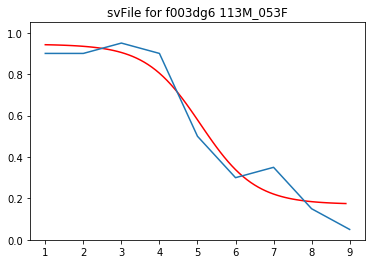

In [104]:
Point_of_subj_equ = []
slope_at_pose = []
names = []
counter = 0
outpath = "/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_online/sex_morph/graphs/csv_files/"
files= datafiles[0]
re.sub(r'Users', "", files[0])
subj = []
response_person_dic = []
max_slope = []

for i in datafiles[0]:
    plt.clf()
    name = datafiles[0][counter][137:-4]
    print name
    names.append(name)
    print(names)
    frame = pd.read_csv(i)
    male = frame.e.values
#     print len(male)
    continuum = frame.Stimula.values
#     print(continuum[0])
    # the following four specifications are for 5 repeats per stimulus
#     _63M_83F = male[:9]
#     _98M_056F = male[9:18]
#     _113M_053F = male[18:27]
#     _018M_019F = male[27:]
    # these specifications are for 20 reps per stim for 018M_019F and 098M_056F:
#     _018M_019F = male[:9]
    ###CHECK CSV FILE FOR THE ORDER OF THE CONTINUA IN IT BEFORE RUNNING THIS!!!
    _113M_053F = male[9:]
    _63M_83F = male[:9]
#     _098M_056F = male[9:]
#     print _63M_83F
    steps = frame.Continuum.values[9:] #change here to the value behind the continuum a few lines above
    popt, pcov = scipy.optimize.curve_fit(fitting, running_mean(steps,2), running_mean(_113M_053F, 2))#, bounds=(0,[10,1,1,inf])) #change name of continuum in this line
#     plt.plot(np.arange(1,9,0.1), fitting(np.arange(1,9,0.1), *popt), 'r-', label='fit')
#     plt.title(name)
    x0,L,R,slope = popt
    L = 1
    R = 0
    PosE = x0-slope*log((1-2*R)/(2*L-1)) #we are calculating this here in case L and R are not equal to 1 and 0
    Point_of_subj_equ.append(PosE)
    PosE_slope= 1/slope #-(1-2*L-2*R+4*L*R)/(4*L*slope-4*R*slope)
    slope_at_pose.append(PosE_slope)
    maxislope = slope
    max_slope.append(maxislope)
    new_str = re.sub(outpath + r'csvFile for ', "", i)
    subj.append(new_str)
    response_person_dic = {'subj': subj, 'PosE': Point_of_subj_equ, 'slope@PosE' : slope_at_pose, 'max slope' : max_slope}
    plotting(popt, steps, _113M_053F, continuum[9],name) #change continuum name here and number in braces after "continuum"
#     print(slope, PosE_slope)
    print(popt)
    counter +=1
    popt
    
    
    

define function for individual plot
run that function through the for loop

## change the name of the file before executing the next cell

In [105]:
dfname = 'results_113M_inlab.csv'

df_overview  = pd.DataFrame(response_person_dic)
df_overview.to_csv(dfname)
df_overview 

,PosE,max slope,slope@PosE,subj
0,5.311259,0.896881,1.114975,/Users/marie/Documents/Projects/morph_project/...
1,4.550722,0.548173,1.824240,/Users/marie/Documents/Projects/morph_project/...
2,4.980574,0.620616,1.611303,/Users/marie/Documents/Projects/morph_project/...
3,4.928367,0.570448,1.753008,/Users/marie/Documents/Projects/morph_project/...
4,4.564112,0.590657,1.693030,/Users/marie/Documents/Projects/morph_project/...
5,3.832297,0.722903,1.383311,/Users/marie/Documents/Projects/morph_project/...
6,4.171152,0.679336,1.472026,/Users/marie/Documents/Projects/morph_project/...
7,4.491271,0.766889,1.303970,/Users/marie/Documents/Projects/morph_project/...
8,5.348433,0.701038,1.426456,/Users/marie/Documents/Projects/morph_project/...
9,5.079398,0.715858,1.396924,/Users/marie/Documents/Projects/morph_project/...


In [18]:
pwd

u'/Users/marie/Documents/Projects/morph_project/Code/Sex_Morph'

In [4]:
popt

NameError: name 'popt' is not defined

In [21]:
Point_of_subj_equ

[3.916275551682482,
 5.116921289974399,
 5.168133758835553,
 4.570795968375058,
 3.3919931103689747,
 3.0981853272984234,
 4.40689693816398,
 4.646796285139776,
 4.6375807377209926,
 3.3236135288855677]

In [22]:
mean(Point_of_subj_equ)

4.227719249644521

In [23]:
slope_at_pose

[1.4028226398703916,
 2.389315483019165,
 206.60338983218173,
 1.7248586125584486,
 1.3049785682247588,
 1.135204540270394,
 1.7688138156945932,
 1.5162567412874304,
 1.2866427833823262,
 1.092710484901807]

In [24]:
mean(slope_at_pose)

22.022499350139103

In [25]:
np.std(slope_at_pose)

61.52802341375598

### Below we define the fitting function to be able to fit a sigmoid to our data. 
##### "L" stands for the value at an infinetly male face (most left on the continuum, even outside of the continuum that we present the subject with).
##### "R" stands for the value at an infinetly female face (most right on the continuum, even outside of the continuum that we present the subject with)
#### We assume that the switch from male to female happens somewhere on our continuum and outside of our continuum there won't be much change anymore. 

In [80]:
def fitting(x, x0, L, R, slope):
    return L-((L-R)/(1+exp((-x+x0)/slope)))



In [110]:
continuum

array(['63M_83F', '63M_83F', '63M_83F', '63M_83F', '63M_83F', '63M_83F',
       '63M_83F', '63M_83F', '63M_83F', '98M_056F', '98M_056F',
       '98M_056F', '98M_056F', '98M_056F', '98M_056F', '98M_056F',
       '98M_056F', '98M_056F', '113M_053F', '113M_053F', '113M_053F',
       '113M_053F', '113M_053F', '113M_053F', '113M_053F', '113M_053F',
       '113M_053F', '018M_019F', '018M_019F', '018M_019F', '018M_019F',
       '018M_019F', '018M_019F', '018M_019F', '018M_019F', '018M_019F'],
      dtype=object)

In [88]:
# here we define the continuum and the steps (y-axis and x-axis)
_63M_83F = male[:9]
_63M_83F
_98M_056F = male[9:18]
_113M_053F = male[18:27]
_018M019F = male[27:]


steps = frame.Continuum.values[:9]

In [113]:
steps

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [114]:
# _63M_83F
_98M_056F

array([0.8, 1. , 1. , 1. , 0.8, 0.8, 0.6, 0.4, 0.2])

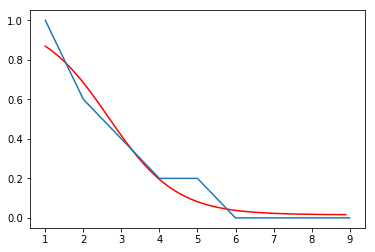

In [112]:
# L = _63M_83F[0]
# R = _63M_83F[-1]

#L and R need to be defined, otherwise it will throw an error
def fitting(x, x0, L, R, slope):
    return L-((L-R)/(1+exp((-x+x0)/slope)))

popt, pcov = scipy.optimize.curve_fit(fitting, steps, _63M_83F, bounds=(0,[10,1,1,inf]))
plt.plot(np.arange(1,9,0.1), fitting(np.arange(1,9,0.1), *popt), 'r-', label='fit')
plt.plot(steps, _63M_83F)








In [77]:
popt
# array([4.13626826e+00, 9.45463010e-01, 5.80828241e-33, 3.02949156e-01]) = point of subj equality, L, R, slope)


array([4.13626826e+00, 9.45463010e-01, 5.80828241e-33, 3.02949156e-01])

# The parameter "slope" in the fitting function is not the actual slope at the point of subjective equality but it is related to it


## two reasons why it's not the "real" slope:
### 1. even if L and R are 1 and 0, the real slope (PosE_slope) is 1/4*slope
### 2. when L and R are not 1 and 0, you have to correct for it

In [81]:
x0,L,R,slope = popt


#### The cell below fixes that the point of subjective equality (PosE) is not equal to x0 if L and R are not 1 and 0 and calculates the real PosE.

In [87]:
# when L and R are not 1 and 0, x0 is not the point of subjective equality
# this function finds the point of subjective equality in this case and in the normal case 
# the only time it fails is if L and R are exactly 0.5
PosE = x0-slope*log((1-2*R)/(2*L-1))
PosE

4.1012794830839905

#### In the next cell we calculate the slope at the point of subjective equality by taking the derivative (ableiten) at that PosE.

In [95]:
PosE_slope= -(1-2*L-2*R+4*L*R)/(4*L*slope-4*R*slope)
PosE_slope

0.7776198932757464

In [96]:
# this is the slope at x0. This is just for comparison.
1/4/slope

0.8252209813200363

In [91]:
x0

4.136268257843829

AttributeError: 'numpy.ndarray' object has no attribute 'type'

NameError: name 'python' is not defined

# The next code is to plot all of the fitted lines into one graph

## Before running the next cell make 4 changes to the continua whenever you switch them

svFile for F001YQ0
['svFile for F001YQ0']
[3.7766257  1.02156275 0.04406976 0.65717077]
svFile for f0042w6
['svFile for F001YQ0', 'svFile for f0042w6']
[ 5.12378298  1.00631183 -0.01265091  0.43308677]
svFile for F003X50
['svFile for F001YQ0', 'svFile for f0042w6', 'svFile for F003X50']
[4.73718455e+00 1.00657804e+00 2.93353913e-03 4.60891963e-01]
svFile for f003d5q
['svFile for F001YQ0', 'svFile for f0042w6', 'svFile for F003X50', 'svFile for f003d5q']
[4.59465441e+00 9.84039122e-01 2.74728728e-03 5.52712819e-01]
svFile for f003d8d
['svFile for F001YQ0', 'svFile for f0042w6', 'svFile for F003X50', 'svFile for f003d5q', 'svFile for f003d8d']
[ 3.494859    0.97258001 -0.01847997  0.75900656]
svFile for F003WYC
['svFile for F001YQ0', 'svFile for f0042w6', 'svFile for F003X50', 'svFile for f003d5q', 'svFile for f003d8d', 'svFile for F003WYC']
[2.75247118 1.10386292 0.05001109 0.85388139]
svFile for F003WZD
['svFile for F001YQ0', 'svFile for f0042w6', 'svFile for F003X50', 'svFile for f003

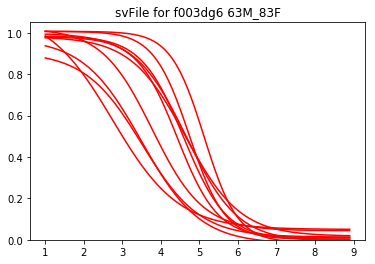

In [103]:
#new plotting function elimits the original data
def plottingallinone(popt, steps, continuum, continuumname, name):
    popt, pcov = scipy.optimize.curve_fit(fitting, running_mean(steps,2), running_mean(continuum,2))#, bounds=(0,[10,1,1,inf]))
    plt.plot(np.arange(1,9,0.1), fitting(np.arange(1,9,0.1), *popt), 'r-', label='fit')
    plt.ylim([0.0, 1.05])
    plt.title(name +" " +str(continuumname))
    plt.savefig(path.join(outpath, name + ' ' + str(continuumname + '.jpeg'))) # + ' ' + str(continuum[0]), format='jpeg')


Point_of_subj_equ = []
slope_at_pose = []
names = []
counter = 0
outpath = "/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_inlab/sex_morph/graphs/csv_files/test/"
files= datafiles[0]
re.sub(r'Users', "", files[0])
subj = []
response_person_dic = []
max_slope = []

for i in datafiles[0]:
#     plt.clf() #removed the "clear the plot" command
    name = datafiles[0][counter][137:-4]
    print name
    names.append(name)
    print(names)
    frame = pd.read_csv(i)
    male = frame.e.values
#     print len(male)
    continuum = frame.Stimula.values
#     print(continuum[0])
    # the following four specifications are for 5 repeats per stimulus
#     _63M_83F = male[:9]
#     _98M_056F = male[9:18]
#     _113M_053F = male[18:27]
#     _018M_019F = male[27:]
    # these specifications are for 20 reps per stim for 018M_019F and 098M_056F:
#     _018M_019F = male[:9]
    _113M_053F = male[9:]
    _63M_83F = male[:9]
#     _098M_056F = male[9:]
#     print _63M_83F
#     print _113M_053F
    steps = frame.Continuum.values[:9]
    popt, pcov = scipy.optimize.curve_fit(fitting, running_mean(steps,2), running_mean(_63M_83F, 2))#, bounds=(0,[10,1,1,inf]))
#     plt.plot(np.arange(1,9,0.1), fitting(np.arange(1,9,0.1), *popt), 'r-', label='fit')
#     plt.title(name)
    x0,L,R,slope = popt
    L = 1
    R = 0
    PosE = x0-slope*log((1-2*R)/(2*L-1)) #we are calculating this here in case L and R are not equal to 1 and 0
    Point_of_subj_equ.append(PosE)
    PosE_slope= 1/slope #-(1-2*L-2*R+4*L*R)/(4*L*slope-4*R*slope)
    slope_at_pose.append(PosE_slope)
    maxislope = slope
    max_slope.append(maxislope)
    new_str = re.sub(outpath + r'csvFile for ', "", i)
    subj.append(new_str)
    response_person_dic = {'subj': subj, 'PosE': Point_of_subj_equ, 'slope@PosE' : slope_at_pose, 'max slope' : max_slope}
    plottingallinone(popt, steps, _63M_83F, continuum[0],name)
#     print(slope, PosE_slope)
    print(popt)
    counter +=1
    popt
    
    
    

# The cell below creates a plot that has only one line: the line of a theoretical AP that has a slope of mean - 2SD of the group data

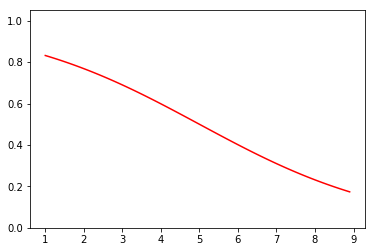

In [117]:
ap_mean = 0.4
conti = '113M_online'
popt = [5,1,0,1/ap_mean]
plt.plot(np.arange(1,9,0.1), fitting(np.arange(1,9,0.1), *popt), 'r-', label='fit')
plt.ylim([0.0, 1.05])
plt.savefig(path.join(outpath, 'artificial_AP_for' + conti + '.jpeg')) # + ' ' + str(continuum[0]), format='jpeg')






In [14]:
running_mean(steps,2)
running_mean(continuum,2)

NameError: name 'steps' is not defined

In [15]:
(datafiles[0][0])

'/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_online/sex_morph/graphs/csv_files/csvFile for Anoush K.csv'

In [16]:
male

NameError: name 'male' is not defined

In [11]:
continuum

NameError: name 'continuum' is not defined